In [68]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

bias = 100
X, y, coef = make_regression(n_samples=500,  n_features=4, bias=bias, coef=True, noise=3, random_state=42)

In [69]:
X.shape

(500, 4)

In [70]:
ya = y.reshape(-1, 1)

In [71]:
m = np.random.randn(X.shape[1], 1)
c = 0

In [72]:
yp = np.dot(X, m) + c

In [73]:
yp.shape

(500, 1)

In [74]:
(yp - ya) * X

array([[ 16.48511939,  25.11713722,  10.9191735 ,  24.13548494],
       [ 32.90884208,   6.89739423,  10.28513991,  22.48634039],
       [ 91.16446407,   1.44168448, -16.9354783 ,   3.92977421],
       ...,
       [ 25.18962251,  -6.60240073,  21.12447642,  44.78408897],
       [-34.04974871,  37.33912436,  42.09096014,  36.3400632 ],
       [-45.27551219, 159.01825754, -21.16136062, -72.71104316]])

In [75]:
(yp - ya)[:2]

array([[-17.85585546],
       [-24.47754068]])

In [76]:
X[:2]

array([[-0.92323325, -1.4066611 , -0.6115178 , -1.35168461],
       [-1.34445051, -0.28178461, -0.42018682, -0.91865195]])

In [77]:
class CustomLinearReg:
    
    def __init__(self, max_iters=100, lr=.1):
        self.max_iters = max_iters
        self.lr = lr

        
    def fit(self, X, y):
        self.__X = X
        self.__ya = y.reshape(-1, 1)
        
        self.coef_ = np.random.randn(self.__X.shape[1], 1)
        self.intercept_ = 0
        
        errors = []
        
        for step in range(self.max_iters):
            
            yp = np.dot(self.__X, self.coef_) + self.intercept_
            del_m = (2 * (yp - self.__ya) * self.__X).mean(axis=0, keepdims=True).T * self.lr
            del_c = (2 * (yp - self.__ya)).mean() * self.lr
            self.coef_-= del_m
            self.intercept_ -= del_c
            errors.append(self.calculate_error())
        
        return errors
    
    def calculate_error(self):
        yp = np.dot(self.__X, self.coef_) + self.intercept_
        return ((yp - self.__ya) ** 2).mean()
    
    def predict(self, X):
        yp = np.dot(X, self.coef_) + self.intercept_
        return yp.flatten()

In [78]:
model = CustomLinearReg()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [80]:
errors = model.fit(X_train, y_train)

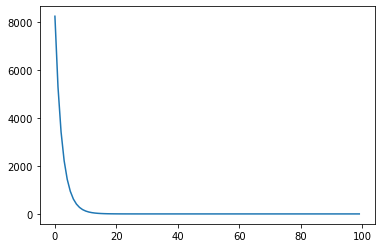

In [81]:
plt.plot(np.arange(len(errors)), errors)

In [82]:
X_test[:10]

array([[ 0.05963037,  0.92463368,  1.39935544, -0.64693678],
       [ 0.91831661,  1.39200229,  0.17989415, -1.5705006 ],
       [-1.02418682,  0.63081168,  1.51344974,  1.85409257],
       [-0.53025762,  0.50404652, -0.98572605, -0.79287283],
       [ 0.44381943, -0.70766947,  1.26691115,  0.77463405],
       [ 0.02079371,  2.05749547,  0.61915426, -0.72800294],
       [ 1.58601682,  0.66213067,  0.11351735, -1.2378155 ],
       [ 0.79426468, -0.52905268, -1.56254586, -1.25428942],
       [-0.24896415,  1.75534084,  2.06074792,  0.97157095],
       [ 1.42050425,  1.18901653, -0.63738713, -0.57074629]])

In [83]:
model.predict(X_test[:10])

array([158.36878008, 131.46462583, 151.17584572,  36.39367962,
       170.756903  , 132.19942604, 150.51933522,  46.52311444,
       198.25701613, 125.26271318])

In [84]:
y_test[:10]

array([154.21413459, 126.60346289, 150.48587768,  32.91739582,
       175.253328  , 130.61733492, 148.72312993,  43.91310513,
       199.39079722, 124.91676786])